In [389]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import pyedflib
import mne
import neurokit2 as nk2
import p_tqdm
from scipy.stats import trim_mean
from scipy import signal
from scipy.optimize import least_squares
import statsmodels.api as sm
from collections import defaultdict
import wfdb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor
from scipy.interpolate import interp1d
import shutil
from scipy.signal import savgol_filter

In [9]:
shutil.move('/Users/jaredperez/Downloads/simultaneous-physiological-measurements-with-five-devices-at-different-cognitive-and-physical-loads-1.0.1/raw_data/',
           '/Users/jaredperez/')


'/Users/jaredperez/raw_data'

In [86]:
result, fields = wfdb.rdsamp('x010')
header=fields['sig_name']
desired_result=pd.DataFrame(data=result, columns=header)

In [41]:
path=('/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/*')
glob.glob('/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/*')

['/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x010_NEXUS.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x001_SOT.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x011_SOT.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x004_NEXUS.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x002_POLAR.hrm',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x013_HX.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x003_FAROS.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x009_NEXUS.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x001_HX.edf',
 '/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x008_SOT.edf',
 '

In [61]:
dfs = defaultdict(lambda: defaultdict(pd.DataFrame))

for files in glob.glob('/Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/*'):
    key = os.path.splitext(os.path.basename(files))[1]
    base_name = os.path.splitext(os.path.basename(files))[0]
    sensor = base_name.split('_')[-1]
    if key == '.edf':
        file = mne.io.read_raw_edf(files)
        file = file.to_data_frame()
    else:
        file = pd.read_csv(files, on_bad_lines='skip', names=['R-R Interval (ms)'])
    dfs[sensor][base_name] = file

Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x010_NEXUS.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x001_SOT.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x011_SOT.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x004_NEXUS.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x013_HX.edf...
EDF file detected
Se

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x007_FAROS.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x002_HX.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x010_HX.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiological Measurements at Different Loads/raw_data/x005_SOT.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/jaredperez/Multiple Physiologic

In [99]:
pd.concat(dfs['FAROS'], axis=1)

x003_FAROS                                                         \
              time    ECG Accelerometer_X Accelerometer_Y Accelerometer_Z   
0            0.000  944.0    9.100000e+08   -1.075000e+08   -3.930000e+08   
1            0.001  932.0    9.074109e+08   -1.146383e+08   -3.902630e+08   
2            0.002  929.0    9.039169e+08   -1.205736e+08   -3.876677e+08   
3            0.003  918.0    8.996692e+08   -1.251890e+08   -3.853900e+08   
4            0.004  913.0    8.948533e+08   -1.284129e+08   -3.836073e+08   
...            ...    ...             ...             ...             ...   
3937995        NaN    NaN             NaN             NaN             NaN   
3937996        NaN    NaN             NaN             NaN             NaN   
3937997        NaN    NaN             NaN             NaN             NaN   
3937998        NaN    NaN             NaN             NaN             NaN   
3937999        NaN    NaN             NaN             NaN             NaN   

                                                    x008_FAROS          ...  \
               Marker           HRV DEV_Temperature       time     ECG  ...   
0       -3.276700e+10  2.910383e-08    3.004552e+07      0.000  1104.0  ...   
1       -3.276700e+10  2.342842e+06    3.004552e+07      0.001  1089.0  ...   
2       -3.276700e+10  4.680403e+06    3.004552e+07      0.002  1081.0  ...   
3       -3.276700e+10  7.012191e+06    3.004552e+07      0.003  1075.0  ...   
4       -3.276700e+10  9.337716e+06    3.004552e+07      0.004  1076.0  ...   
...               ...           ...             ...        ...     ...  ...   
3937995           NaN           NaN             NaN   3937.995    -9.0  ...   
3937996           NaN           NaN             NaN   3937.996   -15.0  ...   
3937997           NaN           NaN             NaN   3937.997     8.0  ...   
3937998           NaN           NaN             NaN   3937.998    20.0  ...   
3937999           NaN           NaN             NaN   3937.999     7.0  ...   

           x006_FAROS                 x012_FAROS                          \
                  HRV DEV_Temperature       time     ECG Accelerometer_X   
0       -1.455192e-08    2.937351e+07      0.000  3077.0    9.315000e+08   
1        1.427839e+06    2.937351e+07      0.001  3080.0    9.292019e+08   
2        2.867822e+06    2.937351e+07      0.002  3082.0    9.277568e+08   
3        4.319797e+06    2.937351e+07      0.003  3088.0    9.271680e+08   
4        5.783611e+06    2.937351e+07      0.004  3101.0    9.273917e+08   
...               ...             ...        ...     ...             ...   
3937995           NaN             NaN        NaN     NaN             NaN   
3937996           NaN             NaN        NaN     NaN             NaN   
3937997           NaN             NaN        NaN     NaN             NaN   
3937998           NaN             NaN        NaN     NaN             NaN   
3937999           NaN             NaN        NaN     NaN             NaN   

                                                                     \
        Accelerometer_Y Accelerometer_Z        Marker           HRV   
0          4.100000e+07   -2.990000e+08  3.276600e+10 -5.820766e-08   
1          4.385562e+07   -3.032292e+08  3.276600e+10 -4.981011e+06   
2          4.624682e+07   -3.068126e+08  3.276600e+10 -9.918236e+06   
3          4.802940e+07   -3.095696e+08  3.276600e+10 -1.481116e+07   
4          4.912330e+07   -3.113519e+08  3.276600e+10 -1.965929e+07   
...                 ...             ...           ...           ...   
3937995             NaN             NaN           NaN           NaN   
3937996             NaN             NaN           NaN           NaN   
3937997             NaN             NaN           NaN           NaN   
3937998             NaN             NaN           NaN           NaN   
3937999             NaN             NaN           NaN           NaN   

                         
        DEV_Temperature  
0          2.

In [101]:
test=dfs['FAROS']['x006_FAROS']
test

,time,ECG,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Marker,HRV,DEV_Temperature
0,0.000,32767.0,7.595000e+08,2.890000e+08,-5.590000e+08,-3.276700e+10,-1.455192e-08,2.937351e+07
1,0.001,32767.0,7.590085e+08,2.854055e+08,-5.609943e+08,-3.276700e+10,1.427839e+06,2.937351e+07
2,0.002,32767.0,7.588405e+08,2.828519e+08,-5.622517e+08,-3.276700e+10,2.867822e+06,2.937351e+07
3,0.003,32767.0,7.589696e+08,2.813497e+08,-5.627896e+08,-3.276700e+10,4.319797e+06,2.937351e+07
4,0.004,32767.0,7.593539e+08,2.808525e+08,-5.626682e+08,-3.276700e+10,5.783611e+06,2.937351e+07
...,...,...,...,...,...,...,...,...
2110995,2110.995,-39.0,9.442576e+07,3.899495e+08,-7.694913e+08,-3.276700e+10,0.000000e+00,3.133786e+07
2110996,2110.996,-24.0,1.689411e+08,2.797927e+08,-7.993757e+08,-3.276700e+10,0.000000e+00,3.133786e+07
2110997,2110.997,1.0,2.430424e+08,1.720602e+08,-8.266948e+08,-3.276700e+10,0.000000e+00,3.133786e+07
2110998,2110.998,20.0,3.139002e+08,7.083434e+07,-8.507179e+08,-3.276700e+10,0.000000e+00,3.133786e+07


In [102]:
signals,info=nk2.ecg_process(test['ECG'], sampling_rate=1000)

In [268]:
heart_rate=signals['ECG_Rate'][::2000] #Every 2 seconds
heart_rate=heart_rate.reset_index(drop=True)

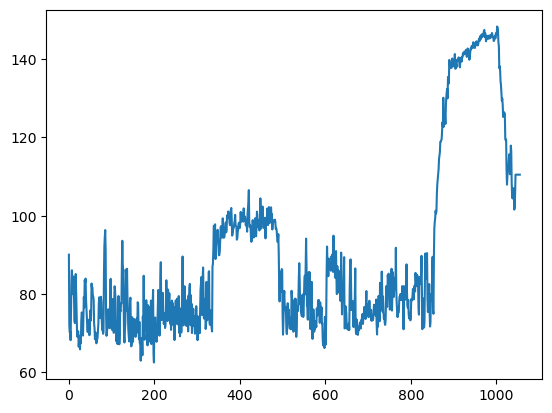

In [269]:
plt.plot(heart_rate)

I want to try and write a function that essentially assess when the values of the series start to change signifcanltyu compared to the preceding values and return the index at when this change happens....

I want to return the sorrounding values so I can see how the heart rate changes during each period of time and then also compare the periods to each other...so I essentially need the segments you can see on the graph above

In [243]:
def detect_index_of_change(series, threshold=1.0):
    diffs = series.diff().abs()
    change_point = diffs[diffs > threshold].index
    return change_point


Once I return indexes, I need to assess whether or not it is an outlier or actually teh beginning of a new segment. We can do this by viewing the last 5 elements and next 10 elements in the series

In [264]:
indexes=detect_index_of_change(heart_rate, threshold=15)

In [265]:
indexes

Int64Index([1, 87, 198, 336, 645, 671], dtype='int64')

In [247]:
indexes[0]

1

In [214]:
heart_rate=heart_rate.reset_index(drop=True)

In [251]:
heart_rate.iloc[indexes[0]-1:indexes[0]+10]

0     90.044778
1     71.955127
2     70.183319
3     70.558943
4     68.195348
5     75.791059
6     83.170615
7     86.065778
8     80.447183
9     79.995341
10    84.513207
Name: ECG_Rate, dtype: float64

In [252]:
heart_rate.iloc[indexes[0]-2:indexes[0]+10]

Series([], Name: ECG_Rate, dtype: float64)

In [256]:
max(0,5-10)

0

In [257]:
min(len(heart_rate)-1, 5+10)

15

In [267]:
indexes

Int64Index([1, 87, 198, 336, 645, 671], dtype='int64')

In [266]:
def slice_around_index(series, index, slice_size=10):
    start = max(0, index - slice_size)
    end = min(len(series) - 1, index + slice_size)
    return series.iloc[start:end+1]

heart_rate = heart_rate
indexes = indexes

for index in indexes:
    slice = slice_around_index(heart_rate, index)
    print(slice)


0     90.044778
1     71.955127
2     70.183319
3     70.558943
4     68.195348
5     75.791059
6     83.170615
7     86.065778
8     80.447183
9     79.995341
10    84.513207
11    80.540437
Name: ECG_Rate, dtype: float64
77    73.189554
78    70.821405
79    71.187969
80    69.831582
81    70.328539
82    84.583269
83    92.115787
84    94.617292
85    96.342975
86    91.199328
87    74.997039
88    69.312753
89    70.138593
90    71.665538
91    71.484911
92    76.073794
93    74.075436
94    74.088758
95    71.267499
96    75.363552
97    83.606280
Name: ECG_Rate, dtype: float64
188    71.469807
189    67.900652
190    76.738681
191    68.381679
192    78.314346
193    67.209003
194    73.895721
195    74.418929
196    77.389518
197    81.041722
198    64.829158
199    62.495514
200    73.204966
201    73.531249
202    74.005686
203    68.144070
204    72.214813
205    67.776340
206    71.043602
207    71.586515
208    76.502916
Name: ECG_Rate, dtype: float64
326    74.521786
327  

In [229]:
heart_rate.iloc[indexes[0]:indexes[0]+3]

2000    71.955127
4000    70.183319
6000    70.558943
Name: ECG_Rate, dtype: float64

The attempted solution above does not work because there are some instances where the bpm jumps up rapidly due to noise without an actual change in the general heart rate 

In [282]:
values=np.array(heart_rate.rolling(100).median())

In [291]:
values

array([         nan,          nan,          nan, ..., 143.79223608,
       143.55433251, 143.47642777])

 Attempting to solve the previous problem of figuring out which segments correspond with different activites by calculating the derivative of the rolling median (smoothed) values

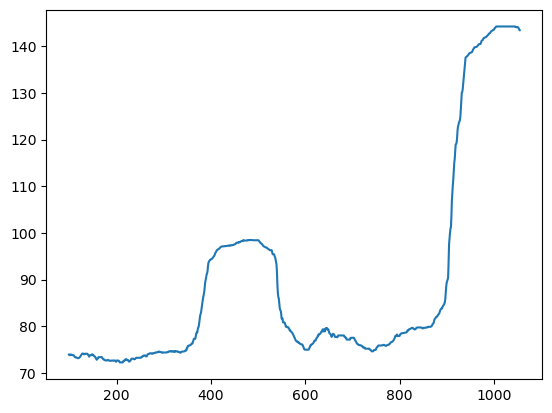

In [566]:
plt.plot(values)

In [283]:
np.arange(values.size)

array([   0,    1,    2, ..., 1053, 1054, 1055])

In [302]:
# Define your smoothed line as a numpy array
line = np.array(values)

In [303]:
# Calculate the first derivative using finite differences
dx = np.diff(line)

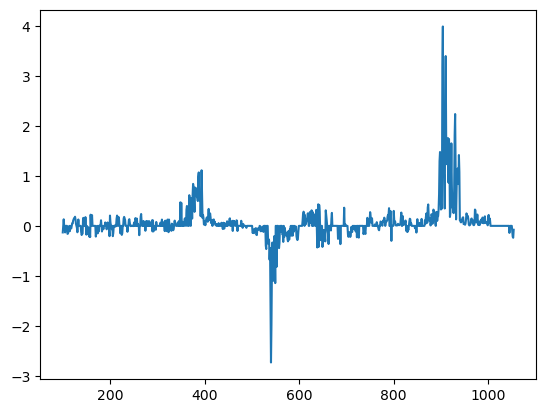

In [304]:
plt.plot(dx)

In [289]:
# Calculate the change in x (the independent variable), assuming it's evenly spaced
dx = np.mean(np.diff(np.arange(line.size)))

In [299]:
def finite_difference(array, dx=1): #Function trhat does np.diff
    """Calculate the finite difference derivative of a numpy array."""
    derivative = np.zeros_like(array)
    derivative[:-1] = (array[1:] - array[:-1]) / dx
    derivative[-1] = (array[-1] - array[-2]) / dx
    return derivative

# Example usage
x = values.index
y = values.values
dy_dx = finite_difference(y)
print(dy_dx)


[        nan         nan         nan ... -0.23790357 -0.07790474
 -0.07790474]


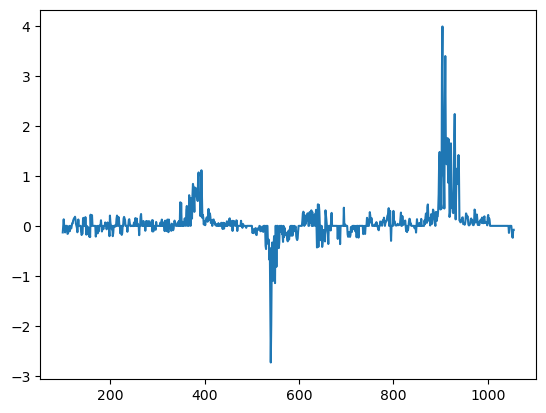

In [318]:
plt.plot(dy_dx)

In [320]:
dy_dx=pd.Series(dy_dx)

In [323]:
dy_dx_binned=pd.cut(dy_dx,4)

In [387]:
other_slope_positive=dy_dx_binned.cat.categories[2]

In [386]:
other_slope_negative=dy_dx_binned.cat.categories[1]

In [388]:
dy_dx[dy_dx_binned==other_slope_negative]

99     -0.131241
100     0.000000
101     0.131241
102     0.000000
103     0.000000
          ...   
1051   -0.117412
1052   -0.218176
1053   -0.237904
1054   -0.077905
1055   -0.077905
Length: 909, dtype: float64

In [385]:
dy_dx[dy_dx_binned==other_slope_positive]

375    0.839819
376    0.777468
379    0.766864
381    0.753407
382    0.745904
386    0.982345
387    1.068658
390    0.635196
393    1.111906
394    0.674413
896    0.633937
897    1.294317
898    1.477714
899    0.759220
905    1.322138
906    1.073908
907    0.959939
909    2.277917
911    1.817118
912    1.484835
913    1.231998
914    1.738251
915    1.755382
916    0.864962
917    1.736610
918    1.336385
921    0.983998
922    1.650121
923    0.829052
928    0.761961
929    1.810861
930    2.236562
931    1.093428
933    0.680274
934    1.091238
935    1.143917
936    1.149329
937    0.836112
938    1.416648
939    1.075392
dtype: float64

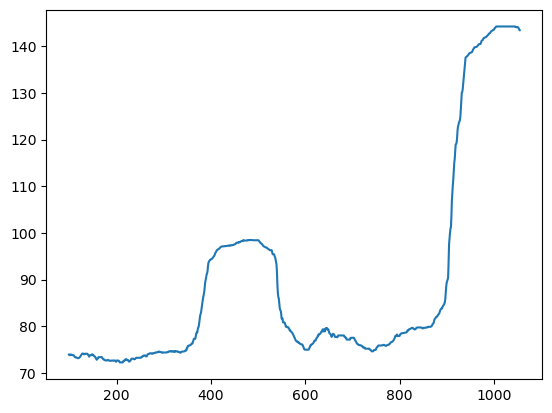

In [342]:
plt.plot(values)

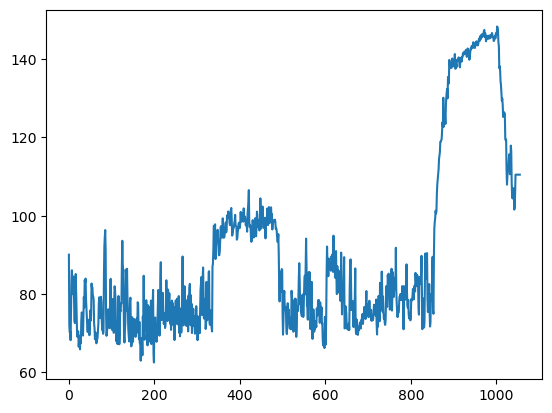

In [436]:
plt.plot(heart_rate)

In [351]:
dy_dx[dy_dx_binned==extremes_left]

539   -1.546057
540   -2.732129
541   -1.971298
545   -1.098298
549   -1.144662
dtype: float64

In [343]:
dy_dx[dy_dx_binned==extremes_right]

903    3.174865
904    3.988081
910    3.396333
dtype: float64

In [373]:
test=values[350:400]

In [378]:
test.diff().argmax()

44

In [331]:
extremes_left=dy_dx_binned.cat.categories[0]
extremes_right=dy_dx_binned.cat.categories[3]

In [368]:
other_slope=dy_dx_binned.cat.categories[2]

In [371]:
dy_dx[dy_dx_binned==other_slope].argmax()

17

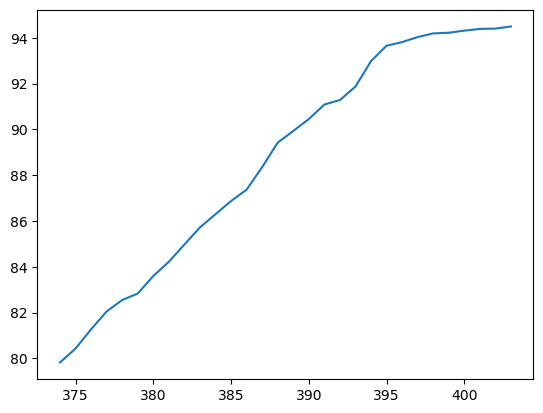

In [380]:
plt.plot(values[384-10:394+10])

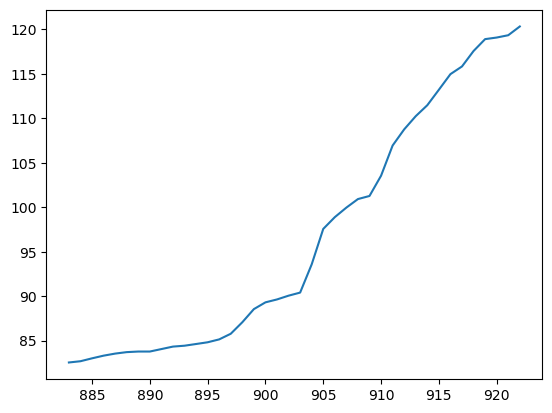

In [349]:
plt.plot(values[903-20:903+20])

This works except I am missing the increase in the first activity because slope may have increased less steeply than the two end bins

 None of the attempts are really getting me the desired solution because they all either miss some of the values needed or dont effectively discriminate the segments

In [391]:
values.dropna()

99       73.903057
100      73.771816
101      73.771816
102      73.903057
103      73.903057
           ...    
1051    144.127824
1052    144.010412
1053    143.792236
1054    143.554333
1055    143.476428
Length: 957, dtype: float64

In [512]:
manual_cut=pd.cut(values, bins=[60,80,90,160])

In [513]:
manual_cut

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
1051    (90.0, 160.0]
1052    (90.0, 160.0]
1053    (90.0, 160.0]
1054    (90.0, 160.0]
1055    (90.0, 160.0]
Length: 1056, dtype: category
Categories (3, interval[int64, right]): [(60, 80] < (80, 90] < (90, 160]]

In [514]:
resting_state=manual_cut.cat.categories[0]
transition_state=manual_cut.cat.categories[1]
activity_state=manual_cut.cat.categories[2]

resting_beats=values[manual_cut==resting_state]
transition_beats=values[manual_cut==transition_state]
activity_beats=values[manual_cut==activity_state]

In [516]:
transition_beats

375    80.433024
376    81.272843
377    82.050311
378    82.552290
379    82.832193
         ...    
897    85.770594
898    87.064912
899    88.542626
900    89.301846
901    89.629395
Length: 66, dtype: float64

In [518]:
differences_resting = np.diff(resting_beats.index)
differences_transition=np.diff(transition_beats.index)
differences_activity=np.diff(activity_beats.index)

Print all the indexes where the difference is 1...that is equivalent to a segment because it is above 80.

Same with resting state

In [532]:
for idx,i in enumerate(differences_resting):
    if i !=1:
        index=idx
        resting_segment=resting_beats.iloc[:idx]
        resting_segment_2=resting_beats.iloc[idx+1:]
        
for idx,i in enumerate(differences_transition):
    if i !=1:
        index=idx
        transition_segment=transition_beats.iloc[:idx]
        transition_segment_2=transition_beats.iloc[idx+1:]
        
for idx,i in enumerate(differences_activity):
    if i !=1:
        index=idx
        activity_segment=activity_beats.iloc[:idx]
        activity_segment_2=activity_beats.iloc[idx+1:]

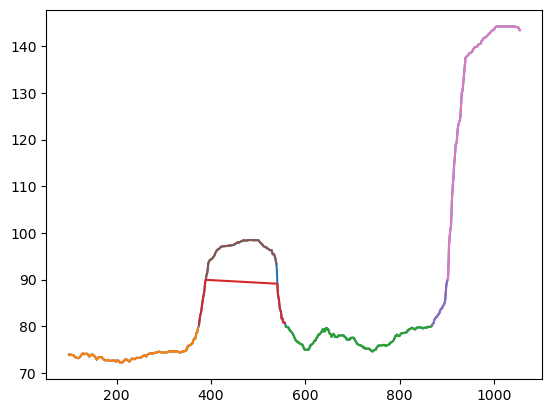

In [539]:
plt.plot(values)
plt.plot(segment)
plt.plot(segment_2)
plt.plot(transition_segment)
plt.plot(transition_segment_2)
plt.plot(activity_segment)
plt.plot(activity_segment_2)

So this method works except in the instance where there is more than just two segments. 

Modify the code to include number of variables equivalent to len of indexes+1 (see below) 

In [695]:
indexes = []
for idx, i in enumerate(differences_transition):
    if i != 1:
        indexes.append(idx)

num_variables=len(indexes)+1
variables = [np.zeros(shape=(1,)) for i in range(num_variables)]

In [547]:
variables

[array([0.]), array([0.]), array([0.])]

In [696]:
indexes = []
for idx, i in enumerate(differences_transition):
    if i != 1:
        indexes.append(idx)

num_variables=len(indexes)+1
variables = [np.zeros(shape=(1,)) for i in range(num_variables)]
for idx, i in enumerate(indexes):
    variables[0] = transition_beats.iloc[:indexes[0]]
    variables[1] = transition_beats.iloc[indexes[0]+1:indexes[1]]
    variables[2]=transition_beats.iloc[indexes[1]+1:]

# Handle the case where there are no instances of i != 1
if not indexes:
    tranition_segment = transition_beats


In [697]:
indexes = []
for idx, i in enumerate(differences_transition):
    if i != 1:
        indexes.append(idx)

num_variables = len(indexes) + 1
variables = [np.zeros(shape=(1,)) for i in range(num_variables)]
for idx, i in enumerate(indexes):
    if idx == 0:
        variables[idx] = transition_beats.iloc[:indexes[idx]]
    else:
        variables[idx] = transition_beats.iloc[indexes[idx-1]+1:indexes[idx]]

if num_variables > 0:
    variables[-1] = transition_beats.iloc[indexes[-1]+1:]


In [700]:
differences_activity

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1, 362,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [712]:
variables[0]

375    80.433024
376    81.272843
377    82.050311
378    82.552290
379    82.832193
380    83.599057
381    84.220793
382    84.974200
383    85.720104
384    86.297057
385    86.871783
386    87.369090
387    88.351435
388    89.420093
dtype: float64

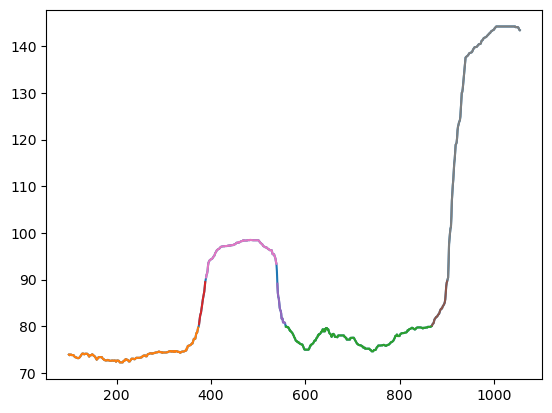

In [698]:
plt.plot(values)
plt.plot(segment)
plt.plot(segment_2)
plt.plot(variables[0])
plt.plot(variables[1])
plt.plot(variables[2])
plt.plot(activity_segment)
plt.plot(activity_segment_2)

Got the image and answer I wanted. Now to combine this into a function and subseqeuntly return the values back to the original heart rate data to determine periods of activity change

In [569]:
len(manual_cut.cat.categories)

3

In [572]:
state=[np.zeros(shape=(1,)) for i in range(len(manual_cut.cat.categories))]


In [574]:
manual_cut.cat.categories[0]

Interval(60, 80, closed='right')

In [ ]:
num_variables=len(indexes)+1
variables = [np.zeros(shape=(1,)) for i in range(num_variables)]

In [647]:
indexes =[np.zeros(shape=(1,)) for i in range(len(beats))]

In [654]:
indexes = []
for idx1, state_difference in enumerate(differences):
    sub_list = []
    for idx2, sequence in enumerate(state_difference):
        if sequence != 1:
            sub_list.append(sequence)
    indexes.append(sub_list)

In [660]:
for idx, i in enumerate(indexes):
    print(i)

[185]
[152, 311]
[362]


In [687]:
indexes

[185, 152, 311, 362]

In [692]:
beats[0].loc[184:190]

184    72.631279
185    72.631279
186    72.563408
187    72.563408
188    72.563408
189    72.563408
190    72.631279
dtype: float64

In [721]:
for idx, i in enumerate(indexes):
    if idx == 0:
        variables[idx] = beats[:indexes[idx]]
    else:
        variables[idx] = transition_beats.iloc[indexes[idx-1]+1:indexes[idx]]

if num_variables > 0:
    variables[-1] = transition_beats.iloc[indexes[-1]+1:]

IndexError: list assignment index out of range

In [726]:
num_variables=len(indexes)+1
variables = [np.zeros(shape=(1,)) for i in range(num_variables)]
for idx, i in enumerate(indexes):
    if idx == 0:
        variables[idx] = beats[:indexes[idx]]
    else:
        variables[idx] = beats[indexes[idx-1]+1:indexes[idx]]

In [729]:
variables[0]

[99     73.903057
 100    73.771816
 101    73.771816
 102    73.903057
 103    73.903057
          ...    
 864    79.845799
 865    79.845799
 866    79.845799
 867    79.955850
 868    79.993345
 Length: 586, dtype: float64,
 375    80.433024
 376    81.272843
 377    82.050311
 378    82.552290
 379    82.832193
          ...    
 897    85.770594
 898    87.064912
 899    88.542626
 900    89.301846
 901    89.629395
 Length: 66, dtype: float64,
 390      90.450707
 391      91.085903
 392      91.280455
 393      91.867254
 394      92.979160
            ...    
 1051    144.127824
 1052    144.010412
 1053    143.792236
 1054    143.554333
 1055    143.476428
 Length: 305, dtype: float64]

# Try and find a way to return 3 indexes arrays (just like beats and differences) each with the respective coordinates ((182), (152, 311), (360)) of the jumps in beats

Then proceed to include that in function and finish off function to plot data

In [611]:
indexes

362

In [603]:
indexes = [np.zeros(shape=(1,)) for i in range(len(manual_cut.cat.categories))]


In [605]:
indexes[0]=differences[0]

indexes[0]=i[j[idx]]

array([0.])

In [732]:
indexes = []
for idx1, state_difference in enumerate(differences):
    sub_list=[]
    for idx2, sequence in enumerate(state_difference):
        if sequence != 1:
            sub_list.append(idx2)
    indexes.append(sub_list)

In [757]:
indexes[0][0]

275

In [759]:
indexes

[[275], [14, 32], [150]]

In [771]:
beats[1][:16]

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_25339/740178922.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  beats[1][:16]


375    80.433024
376    81.272843
377    82.050311
378    82.552290
379    82.832193
380    83.599057
381    84.220793
382    84.974200
383    85.720104
384    86.297057
385    86.871783
386    87.369090
387    88.351435
388    89.420093
389    89.931685
541    89.097562
dtype: float64

In [758]:
beats[1].iloc[:indexes[1][0]]

375    80.433024
376    81.272843
377    82.050311
378    82.552290
379    82.832193
380    83.599057
381    84.220793
382    84.974200
383    85.720104
384    86.297057
385    86.871783
386    87.369090
387    88.351435
388    89.420093
dtype: float64

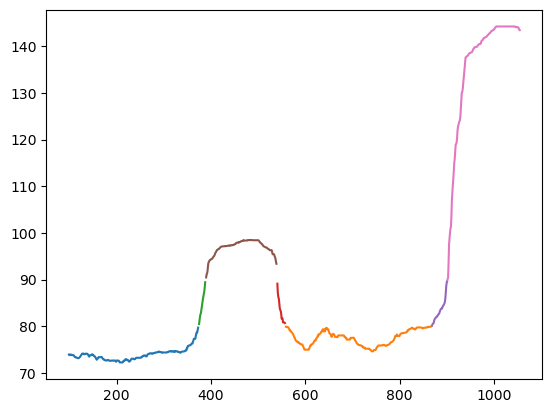

In [773]:
for i, index_set in enumerate(indexes):
    start=0
    for j, end in enumerate(index_set):
        if j == 0:
            plt.plot(beats[i].iloc[:end])
        else:
            plt.plot(beats[i].iloc[start+1:end])
        start = end
    plt.plot(beats[i].iloc[start+1:])

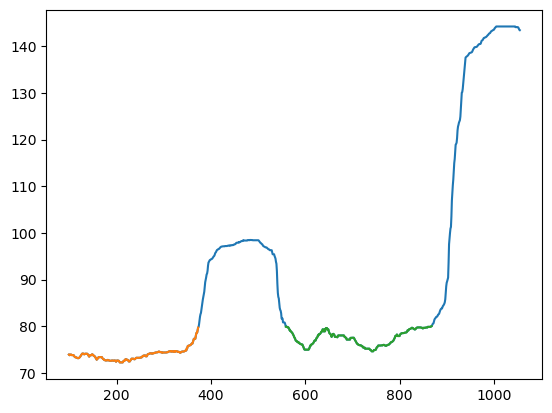

In [753]:
plt.plot(values)
plt.plot(beats[0].iloc[:275])
plt.plot(beats[0].iloc[276:])

In [957]:
values=heart_rate.rolling(100).mean()

In [1161]:
slices[0]

,index,ECG_Rate
0,99,75.466754
1,100,75.279011
2,101,75.267747
3,102,75.352958
4,103,75.358348
...,...,...
300,399,88.816932
301,400,89.043117
302,401,89.343757
303,402,89.635916


In [1168]:
beats

[     index   ECG_Rate
 0       99  75.466754
 1      100  75.279011
 2      101  75.267747
 3      102  75.352958
 4      103  75.358348
 ..     ...        ...
 655    878  87.860117
 656    879  88.318668
 657    880  88.753829
 658    881  89.173536
 659    882  89.672512
 
 [660 rows x 2 columns],
      index    ECG_Rate
 0      404   90.170474
 1      405   90.455959
 2      406   90.754130
 3      407   90.983588
 4      408   91.158597
 ..     ...         ...
 292   1051  132.728891
 293   1052  132.390087
 294   1053  132.055055
 295   1054  131.714244
 296   1055  131.383771
 
 [297 rows x 2 columns]]

In [1177]:
slices

[     index   ECG_Rate
 0       99  75.466754
 1      100  75.279011
 2      101  75.267747
 3      102  75.352958
 4      103  75.358348
 ..     ...        ...
 299    398  88.555303
 300    399  88.816932
 301    400  89.043117
 302    401  89.343757
 303    402  89.635916
 
 [304 rows x 2 columns],
      index   ECG_Rate
 1      100  75.279011
 2      101  75.267747
 3      102  75.352958
 4      103  75.358348
 5      104  75.411536
 ..     ...        ...
 655    878  87.860117
 656    879  88.318668
 657    880  88.753829
 658    881  89.173536
 659    882  89.672512
 
 [659 rows x 2 columns],
      index   ECG_Rate
 0      404  90.170474
 1      405  90.455959
 2      406  90.754130
 3      407  90.983588
 4      408  91.158597
 ..     ...        ...
 118    522  91.249111
 119    523  91.025903
 120    524  90.783210
 121    525  90.514455
 122    526  90.274096
 
 [123 rows x 2 columns],
      index    ECG_Rate
 1      405   90.455959
 2      406   90.754130
 3      407   90.98

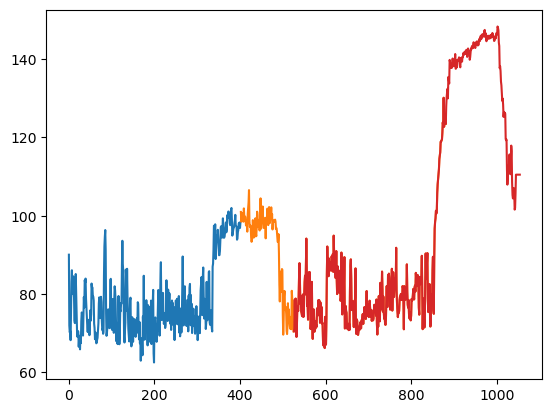

In [1178]:
slices_indexes=[i['index'] for i in slices]
new_indexes=[i.values[-1] for i in slices_indexes]
    
    
original_sequences=[]
start=0
for i in new_indexes:
    sub_sequence=heart_rate[start:i]
    sub_sequences.append(sub_sequence)
    plt.plot(sub_sequence)
    start=i

In [1254]:
heart_rate

0        90.044778
1        71.955127
2        70.183319
3        70.558943
4        68.195348
           ...    
1051    110.497238
1052    110.497238
1053    110.497238
1054    110.497238
1055    110.497238
Name: ECG_Rate, Length: 1056, dtype: float64

In [1317]:
ends=[]
for i, index_set in enumerate(ilocs):
    start=0
    for j, end in enumerate(index_set):
        print(j, end)
        print(index_set)
        start=end
        ends.append(end)
        
print(ends)

0 283
[283]
0 20
[20, 45]
1 45
[20, 45]
0 123
[123]
[283, 20, 45, 123]


In [ ]:
slice_1=beats[1].iloc[]

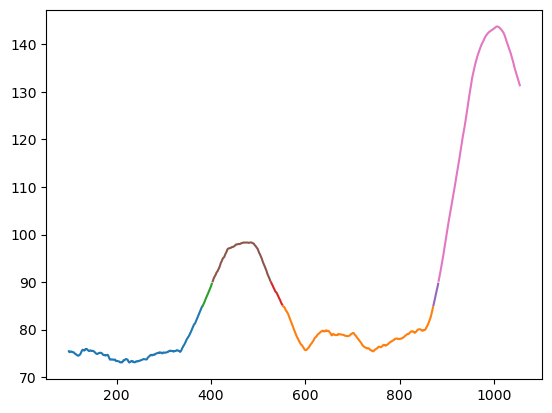

In [1318]:
for i, index_set in enumerate(ilocs):
    start = 0
    for j, end in enumerate(index_set):
        slice_1= beats[i].iloc[start + 1:end] if j != 0 else beats[i].iloc[:end]
        slice_2=beats[i].iloc[start+1:]
        plt.plot(slice_1)
        start = end
    plt.plot(beats[i].iloc[start + 1:])

In [1334]:
new_indexes

[837, 844, 854, 1055]

In [1331]:
slices

[     index   ECG_Rate
 0      577  79.813253
 1      578  79.547128
 2      579  79.275574
 3      580  79.052389
 4      581  78.818717
 ..     ...        ...
 256    833  79.354612
 257    834  79.503115
 258    835  79.547661
 259    836  79.638159
 260    837  79.781201
 
 [261 rows x 2 columns],
      index   ECG_Rate
 0      577  79.813253
 1      578  79.547128
 2      579  79.275574
 3      580  79.052389
 4      581  78.818717
 ..     ...        ...
 266    850  79.806036
 267    851  79.941069
 268    852  79.912951
 269    853  79.900444
 270    854  79.962651
 
 [271 rows x 2 columns],
    index   ECG_Rate
 0    839  80.000595
 1    840  80.033358
 2    841  80.075896
 3    842  80.081526
 4    843  80.086386
 5    844  80.069289,
      index    ECG_Rate
 0      839   80.000595
 1      840   80.033358
 2      841   80.075896
 3      842   80.081526
 4      843   80.086386
 ..     ...         ...
 203   1051  132.728891
 204   1052  132.390087
 205   1053  132.055055
 206  

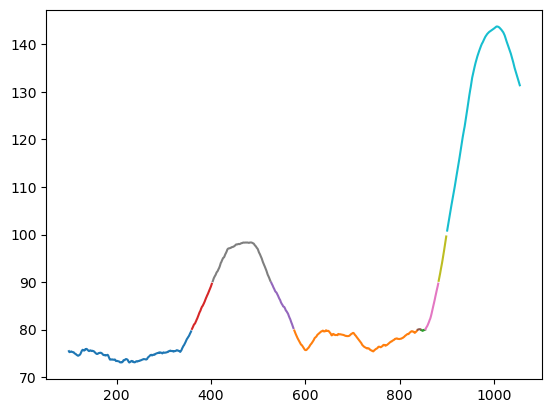

In [1347]:
slices=[]
for i, index_set in enumerate(ilocs):
    start = 0
    for j, end in enumerate(index_set):
        slice_1= beats[i].iloc[start + 1:end] if j != 0 else beats[i].iloc[:end]
        slice_2=beats[i].iloc[start+1:]
        plt.plot(slice_1)
        start = end
    plt.plot(beats[i].iloc[start + 1:])
    slices.append(slice_1)
    slices.append(slice_2)
        
slices=[i.reset_index() for i in slices]
slices_indexes=[i['index'] for i in slices]
new_indexes=[i.values[-1] for i in slices_indexes]
new_indexes.sort()

In [1349]:
ilocs

[[260, 522], [43, 92, 99], [123], []]

In [1323]:
def change_in_activity_rolling(values, bins, manual_adjustment_factor=0):
    manual_cut = pd.cut(values, bins)
    beats = [values[manual_cut == category] for category in manual_cut.cat.categories]
    differences = [np.diff(beat.index) for beat in beats]
    ilocs = [[idx for idx, sequence in enumerate(state_difference) if sequence != 1] for state_difference in differences]

    slices=[]
    for i, index_set in enumerate(ilocs):
        start = 0
        for j, end in enumerate(index_set):
            slice_1= beats[i].iloc[start + 1:end] if j != 0 else beats[i].iloc[:end]
            slice_2=beats[i].iloc[start+1:]
            plt.plot(slice_1)
            start = end
        plt.plot(beats[i].iloc[start + 1:])
        slices.append(slice_1)
        slices.append(slice_2)
        
    slices=[i.reset_index() for i in slices]
    slices_indexes=[i['index'] for i in slices]
    new_indexes=[i.values[-1] for i in slices_indexes]
    new_indexes.sort()

    
    return beats,ilocs, slices, slices_indexes, new_indexes

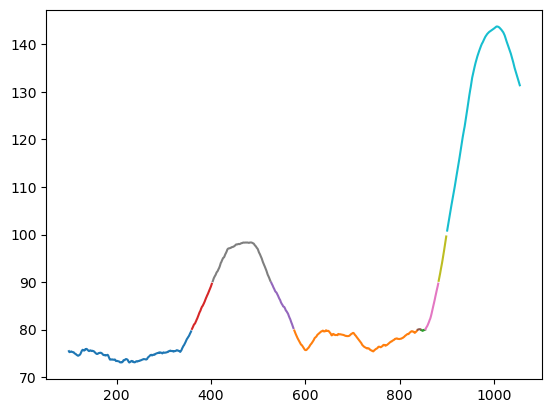

In [1343]:
beats, ilocs, slices, slices_indexes,new_indexes=change_in_activity_rolling(values=values, bins=[60,80,90,100,160])

The function above successfully identifies indexes where the heart rate switches according to the user chosen bins

In [1361]:
beats[0].iloc[259:265]

358    79.620834
359    79.846104
577    79.813253
578    79.547128
579    79.275574
580    79.052389
Name: ECG_Rate, dtype: float64

In [1346]:
ilocs

[[260, 522], [43, 92, 99], [123], []]

In [1219]:
test_sequences=[i.shift(-100) for i in original_seqeunces]

In [1295]:
slices

[     index   ECG_Rate
 0       99  75.466754
 1      100  75.279011
 2      101  75.267747
 3      102  75.352958
 4      103  75.358348
 ..     ...        ...
 278    377  83.814887
 279    378  84.010755
 280    379  84.322042
 281    380  84.545822
 282    381  84.789497
 
 [283 rows x 2 columns],
      index   ECG_Rate
 0      100  75.279011
 1      101  75.267747
 2      102  75.352958
 3      103  75.358348
 4      104  75.411536
 ..     ...        ...
 597    867  82.982175
 598    868  83.388649
 599    869  83.836771
 600    870  84.271435
 601    871  84.712543
 
 [602 rows x 2 columns],
     index   ECG_Rate
 0     528  89.899467
 1     529  89.664497
 2     530  89.463958
 3     531  89.282896
 4     532  89.028916
 5     533  88.804890
 6     534  88.627156
 7     535  88.399555
 8     536  88.162554
 9     537  87.996166
 10    538  87.891596
 11    539  87.799874
 12    540  87.624167
 13    541  87.398475
 14    542  87.222964
 15    543  86.999291
 16    544  86.76066

In [1281]:
new_indexes

[381, 526, 551, 871, 882, 1055]

In [1280]:
slices[4]

,index,ECG_Rate
0,404,90.170474
1,405,90.455959
2,406,90.754130
3,407,90.983588
4,408,91.158597
...,...,...
118,522,91.249111
119,523,91.025903
120,524,90.783210
121,525,90.514455


In [1234]:
original_seqeunces[0][99:]

99     73.709920
100    71.270510
101    70.828751
102    78.704356
103    71.097957
         ...    
397    97.975291
398    98.219341
399    97.337151
400    96.883518
401    98.269352
Name: ECG_Rate, Length: 303, dtype: float64

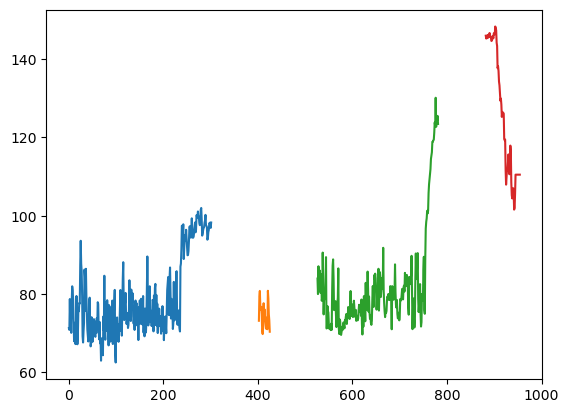

In [1222]:
plt.plot(test_sequences[0])
plt.plot(test_sequences[1])
plt.plot(test_sequences[2])
plt.plot(test_sequences[3])

In [1211]:
original_seqeunces=[original_seqeunces

[0      90.044778
 1      71.955127
 2      70.183319
 3      70.558943
 4      68.195348
          ...    
 397    97.975291
 398    98.219341
 399    97.337151
 400    96.883518
 401    98.269352
 Name: ECG_Rate, Length: 402, dtype: float64,
 402    100.970480
 403     98.484850
 404     99.347598
 405    100.715845
 406     99.791554
           ...    
 521     80.817832
 522     78.873540
 523     74.830546
 524     73.311911
 525     70.352946
 Name: ECG_Rate, Length: 124, dtype: float64,
 526     70.450308
 527     71.194452
 528     78.559879
 529     71.580911
 530     78.817230
           ...    
 877    122.728073
 878    123.999091
 879    124.343265
 880    125.523013
 881    123.456790
 Name: ECG_Rate, Length: 356, dtype: float64,
 882     127.964987
 883     130.256023
 884     131.512392
 885     132.438499
 886     129.996137
            ...    
 1050    110.497238
 1051    110.497238
 1052    110.497238
 1053    110.497238
 1054    110.497238
 Name: ECG_Rate, Length: 1

In [1000]:
differences

[array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1

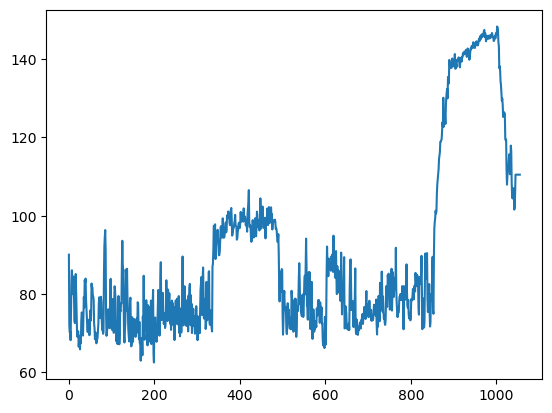

In [790]:
plt.plot(heart_rate)

Finally got a working function that isolates the specific segments (for the most part). So what is the goal now? The goal is to use the function to isolate the periods of the actual heart rate signal that were during each activity so we have labels for the type of activity from the raw data

Return the specific iloc index within the larger heart_rate series where the heart rate starts to change and put that into function as well

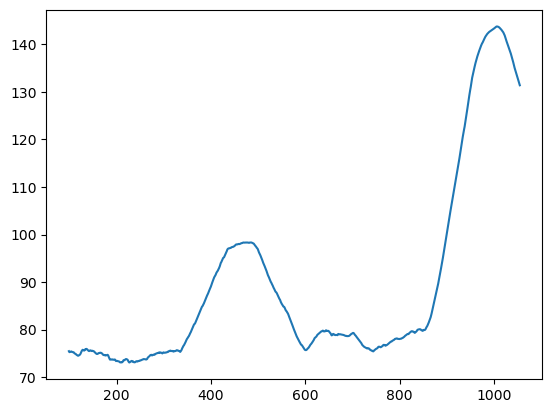

In [967]:
plt.plot(values)

In [1001]:
ilocs

[[304], [123]]

In [1107]:
slices=[]
for i, index_set in enumerate(ilocs):
    start = 0
    for j, end in enumerate(index_set):
        slc1=beats[i].iloc[start+1:end+1] if j != 0 else beats[i].iloc[:end+1]
        start=end
    slc2=beats[i].iloc[start+1:]
    slices.append(slc1)
    slices.append(slc2)

In [1108]:
slices_indexes=[i['index'] for i in slices]

In [1109]:
slices

[     index   ECG_Rate
 0       99  75.466754
 1      100  75.279011
 2      101  75.267747
 3      102  75.352958
 4      103  75.358348
 ..     ...        ...
 300    399  88.816932
 301    400  89.043117
 302    401  89.343757
 303    402  89.635916
 304    403  89.919345
 
 [305 rows x 2 columns],
      index   ECG_Rate
 305    528  89.899467
 306    529  89.664497
 307    530  89.463958
 308    531  89.282896
 309    532  89.028916
 ..     ...        ...
 655    878  87.860117
 656    879  88.318668
 657    880  88.753829
 658    881  89.173536
 659    882  89.672512
 
 [355 rows x 2 columns],
      index   ECG_Rate
 0      404  90.170474
 1      405  90.455959
 2      406  90.754130
 3      407  90.983588
 4      408  91.158597
 ..     ...        ...
 119    523  91.025903
 120    524  90.783210
 121    525  90.514455
 122    526  90.274096
 123    527  90.052668
 
 [124 rows x 2 columns],
      index    ECG_Rate
 124    883   90.265271
 125    884   90.760311
 126    885   91.26

I finally have the segments of ECG that correspond to activity based on heart rate. Now I need to apply these segments to the heart_rate data (every 2 seconds) and then the original heart rate data

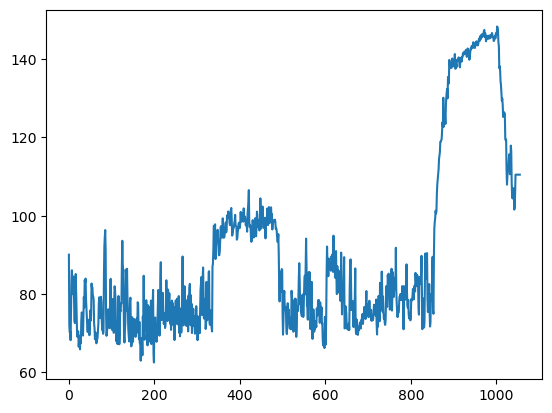

In [1101]:
plt.plot(heart_rate)

In [1111]:
heart_rate

0        90.044778
1        71.955127
2        70.183319
3        70.558943
4        68.195348
           ...    
1051    110.497238
1052    110.497238
1053    110.497238
1054    110.497238
1055    110.497238
Name: ECG_Rate, Length: 1056, dtype: float64

In [1125]:
new_indexes=[i.values[-1] for i in slices_test]

In [1127]:
new_indexes.sort()

In [1128]:
new_indexes

[403, 527, 882, 1055]

In [1205]:
heart_rate

0        90.044778
1        71.955127
2        70.183319
3        70.558943
4        68.195348
           ...    
1051    110.497238
1052    110.497238
1053    110.497238
1054    110.497238
1055    110.497238
Name: ECG_Rate, Length: 1056, dtype: float64

In [1206]:
sub_sequences

[0      90.044778
 1      71.955127
 2      70.183319
 3      70.558943
 4      68.195348
          ...    
 397    97.975291
 398    98.219341
 399    97.337151
 400    96.883518
 401    98.269352
 Name: ECG_Rate, Length: 402, dtype: float64,
 402    100.970480
 403     98.484850
 404     99.347598
 405    100.715845
 406     99.791554
           ...    
 521     80.817832
 522     78.873540
 523     74.830546
 524     73.311911
 525     70.352946
 Name: ECG_Rate, Length: 124, dtype: float64,
 526     70.450308
 527     71.194452
 528     78.559879
 529     71.580911
 530     78.817230
           ...    
 877    122.728073
 878    123.999091
 879    124.343265
 880    125.523013
 881    123.456790
 Name: ECG_Rate, Length: 356, dtype: float64,
 882     127.964987
 883     130.256023
 884     131.512392
 885     132.438499
 886     129.996137
            ...    
 1050    110.497238
 1051    110.497238
 1052    110.497238
 1053    110.497238
 1054    110.497238
 Name: ECG_Rate, Length: 1

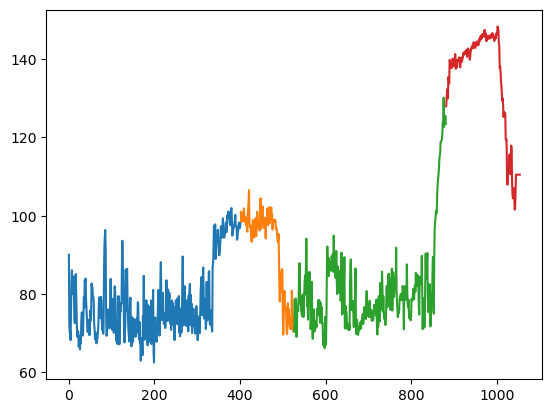

In [1204]:
sub_sequences=[]
start=0
for i in new_indexes:
    sub_sequence=heart_rate[start:i]
    sub_sequences.append(sub_sequence)
    plt.plot(sub_sequence)
    start=i

In [1015]:
indexes

[403, 527, 528, 883]

In [1016]:
ilocs

[[304], [123]]

In [1029]:
beats[1].iloc[120]

index       524.00000
ECG_Rate     90.78321
Name: 120, dtype: float64

In [1033]:
beats[0].iloc[305]

index       528.000000
ECG_Rate     89.899467
Name: 305, dtype: float64

In [998]:
beats[0].iloc[375:379]

,index,ECG_Rate
375,598,75.917168
376,599,75.797082
377,600,75.718925
378,601,75.694370


In [1008]:
indexes=[]

In [1014]:
indexes

[403, 527, 528, 883]

In [1013]:
indexes=[]
for i, index_set in enumerate(ilocs):
    for j, end in enumerate(index_set):
        x=beats[i].iloc[end]
        y=beats[i].iloc[end+1]
        indexes.append(x)
        indexes.append(y)
indexes=[i['index'] for i in indexes]
indexes.sort()
indexes=[int(i) for i in indexes]

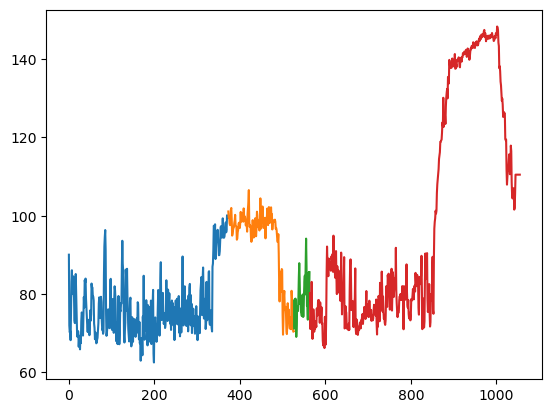

In [972]:
plt.plot(heart_rate[:xs[0]])
plt.plot(heart_rate[xs[0]:xs[2]])
plt.plot(heart_rate[xs[2]:xs[3]])
plt.plot(heart_rate[xs[3]:])

So i was able to find a solution to one specific instance but it doesn't generalize at all to different bins sizes or numbers so I am kind of starting again from scratch after the ilocs portion which teh function does work properly for

Finally, after much heartache, I was able to find the solution to the problem. I was not keeping track of the previous end point in slices, once I do that it is able to correctly slice through the data

In [1675]:
def change_in_activity(values, bins, adjustment_factor=0):
    manual_cut = pd.cut(values, bins)
    beats = [values[manual_cut == category] for category in manual_cut.cat.categories]
    differences = [np.diff(beat.index) for beat in beats]
    ilocs = [[idx for idx, sequence in enumerate(state_difference) if sequence != 1] for state_difference in differences]

    fig,ax=plt.subplots(1,2)
    slices = []
    for i, index_set in enumerate(ilocs):
        prev_end = 0
        for j, end in enumerate(index_set):
            slice_start = prev_end
            slice_end = end
            if j == 0:
                slice_start = 0
            slice_1 = beats[i].iloc[slice_start+1:slice_end]
            slices.append(slice_1)
            ax[0].plot(slice_1)
            prev_end = end
        slice_start = prev_end
        slice_3 = beats[i].iloc[slice_start+1:]
        ax[0].plot(slice_3)
        slices.append(slice_3)

    slices=[i.reset_index() for i in slices]
    slices_indexes=[i['index'] for i in slices]
    new_indexes=[i.values[-1] for i in slices_indexes]
    new_indexes.sort()
    
    adjusted_indexes=[i+adjustment_factor for i in new_indexes]
    for i in range(len(adjusted_indexes)):
        if i == 0:
            ax[1].plot(heart_rate.iloc[:adjusted_indexes[i]])
        else:
            ax[1].plot(heart_rate.iloc[adjusted_indexes[i-1]:adjusted_indexes[i]])
    
    return new_indexes, adjusted_indexes

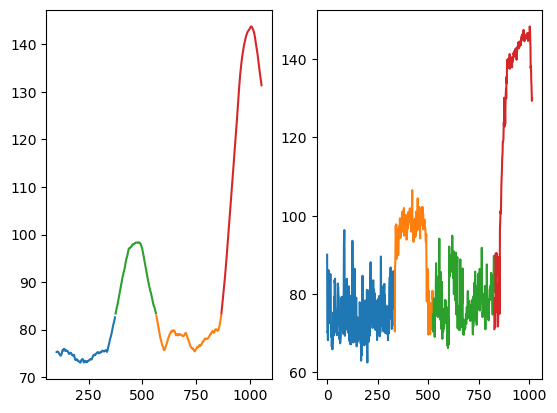

In [1679]:
new_indexes, adjusted_indexes=change_in_activity(values, bins=[60,83,160], adjustment_factor=-40)

In [1677]:
adjusted_indexes

[318, 362, 486, 535, 797, 804, 814, 842, 1015]

You can visually validate the new indexes that are returned as well and see that they are correct

Now we can try and relate these indexes to the original heart rate data

In [1627]:
len(heart_rate)

1056

In [1624]:
xs=[i-40 for i in new_indexes]

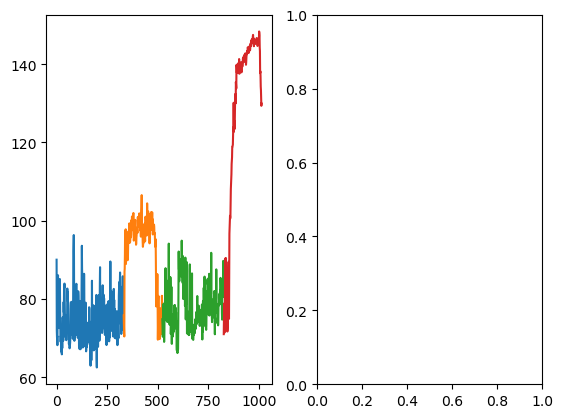

In [1643]:
fig,ax=plt.subplots(1,2)
for i in range(len(xs)):
    if i == 0:
        ax[0].plot(heart_rate.iloc[:xs[i]])
    else:
        ax[0].plot(heart_rate.iloc[xs[i-1]:xs[i]])

# Use the indexes to establish when activity changes

In [1654]:
heart_rate

0        90.044778
1        71.955127
2        70.183319
3        70.558943
4        68.195348
           ...    
1051    110.497238
1052    110.497238
1053    110.497238
1054    110.497238
1055    110.497238
Name: ECG_Rate, Length: 1056, dtype: float64

In [1659]:
test=signals['ECG_Rate'][::2000]

In [1661]:
test=test.reset_index()

In [1716]:
adjusted_indexes

[332, 523, 827, 1015]

In [1718]:
test_i=[test.iloc[i] for i in adjusted_indexes]

In [1719]:
test_i

[index       664000.00000
 ECG_Rate        75.78884
 Name: 332, dtype: float64,
 index       1.046000e+06
 ECG_Rate    7.483055e+01
 Name: 523, dtype: float64,
 index       1.654000e+06
 ECG_Rate    7.101181e+01
 Name: 827, dtype: float64,
 index       2.030000e+06
 ECG_Rate    1.284012e+02
 Name: 1015, dtype: float64]

In [1720]:
OG_indexes=[int(i['index']) for i in test_i]

In [1721]:
OG_indexes

[664000, 1046000, 1654000, 2030000]

In [1725]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,32767.0,161.666702,90.044778,0.957125,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,32767.0,163.887632,90.044778,0.957125,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,32767.0,166.109231,90.044778,0.957125,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,32767.0,168.332132,90.044778,0.957125,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,32767.0,170.556937,90.044778,0.957125,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110995,-39.0,23.203583,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2110996,-24.0,24.603899,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2110997,1.0,25.980110,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2110998,20.0,27.204435,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [1722]:
Standing=signals[:OG_indexes[0]]
Walking=signals[OG_indexes[0]:OG_indexes[1]]
Cognitive=signals[OG_indexes[1]:OG_indexes[2]]
Uphill=signals[OG_indexes[2]:]

In [1724]:
Uphill

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
1654000,-328.0,-109.119167,71.011812,0.996259,0,0,0,0,0,0,0,0,0,0,0,0.0,0.851093,0.0,0.610915
1654001,-340.0,-107.531212,71.011759,0.996254,0,0,0,0,0,0,0,0,0,0,0,0.0,0.852459,0.0,0.612676
1654002,-347.0,-106.045483,71.011707,0.996249,0,0,0,0,0,0,0,0,0,0,0,0.0,0.853825,0.0,0.614437
1654003,-346.0,-104.624482,71.011654,0.996245,0,0,0,0,0,0,0,0,0,0,0,0.0,0.855191,0.0,0.616197
1654004,-341.0,-103.208208,71.011602,0.996240,0,0,0,0,0,0,0,0,0,0,0,0.0,0.856557,0.0,0.617958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110995,-39.0,23.203583,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.000000,NaN,0.000000
2110996,-24.0,24.603899,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.000000,NaN,0.000000
2110997,1.0,25.980110,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.000000,NaN,0.000000
2110998,20.0,27.204435,110.497238,0.788466,0,0,0,0,0,0,0,0,0,0,0,NaN,0.000000,NaN,0.000000
